In [1]:
import pandas as pd 
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import (confusion_matrix,accuracy_score)

import seaborn as sns

In [56]:
dataframe = pd.read_csv("Smarket.csv")
dataframe=dataframe.drop("index",axis="columns")
s=dataframe.iloc[1246:1249]["Year"]


In [4]:
dataframe.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


In [66]:
s=dataframe["Direction"]
dataframe=dataframe.replace(['Up','Down'],[1,0])
dataframe

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,1
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,1
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,0
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,1
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,1
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,1
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,0
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,1
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,0


In [67]:

model=smf.logit('Direction ~Lag1+Lag2+Lag3+Lag4+Lag5+Volume', data=dataframe).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Mon, 03 May 2021   Pseudo R-squ.:                0.002074
Time:                        10:46:06   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.7319
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.050     -1.457      0.145      -0.171       0.025
Lag2          -0.0423      0.050     -0.845      0.398      -0.140       0.056
Lag3           0.0111      0.050      0.222      0.824      -0.087       0.109
Lag4           0.0094      0.050      0.187      0.851      -0.089       0.107
Lag5           0.0103      0.050      0.208      0.835      -0.087       0.107
Volume         0.1354      0.158      0.855      0.392      -0.175       0.446
==============================================================================
"""

In [68]:
#extraction of coeffecients
print(model.params)

Intercept   -0.126000
Lag1        -0.073074
Lag2        -0.042301
Lag3         0.011085
Lag4         0.009359
Lag5         0.010313
Volume       0.135441
dtype: float64


In [69]:
#printing first 10 predictions in various ways
df=model.predict(dataframe)
df1=df.head(10)
df2=df.iloc[0:10]
df3=df.loc[0:9]
print(df2)

0    0.507084
1    0.481468
2    0.481139
3    0.515222
4    0.510781
5    0.506956
6    0.492651
7    0.509229
8    0.517614
9    0.488838
dtype: float64


In [74]:
df4=np.round(df).astype("int64")
df4
print(confusion_matrix(dataframe["Direction"],df4))
print(accuracy_score(dataframe["Direction"],df4))


[[145 457]
 [141 507]]
0.5216


In [115]:
df5 = dataframe[dataframe["Year"]>2004]
df6 = dataframe[dataframe["Year"]<2005]
model2=smf.logit('Direction ~Lag1+Lag2+Lag3+Lag4+Lag5+Volume', data=df6).fit()
df7=model2.predict(df5)
df7=np.round(df7).astype("int64")

print(confusion_matrix(df5["Direction"],df7))
print(accuracy_score(df5["Direction"],df7))

Optimization terminated successfully.
         Current function value: 0.691936
         Iterations 4
[[77 34]
 [97 44]]
0.4801587301587302


In [116]:
model3=smf.logit('Direction~Lag1+Lag2',data=df6).fit()
df8=model3.predict(df5)
df8=np.round(df8).astype('int64')
print(confusion_matrix(df5["Direction"],df8))
print(accuracy_score(df5["Direction"],df8))


Optimization terminated successfully.
         Current function value: 0.692085
         Iterations 3
[[ 35  76]
 [ 35 106]]
0.5595238095238095


0.5595238095238095
group means: [[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]
priors: [0.49198397 0.50801603]
coeff: [[-0.05544078 -0.0443452 ]]


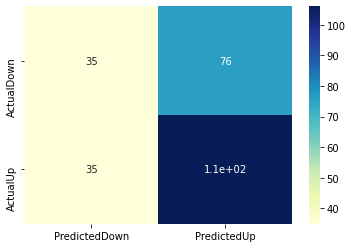

In [159]:
#LDA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
lda.fit(df6[['Lag1','Lag2']],df6["Direction"])
predictions=lda.predict(df5[['Lag1','Lag2']])


cmt= pd.DataFrame(confusion_matrix(df5["Direction"],predictions),index=["ActualDown","ActualUp"],columns=["PredictedDown","PredictedUp"])
sns.heatmap(cmt,cmap="YlGnBu",annot=True)
print(accuracy_score(df5["Direction"],predictions))

print("group means:",lda.means_)
print("priors:",lda.priors_)
print("coeff:",lda.coef_)

0.5992063492063492
group means: [[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]
priors: [0.49198397 0.50801603]
coeff: [[-0.05544078 -0.0443452 ]]


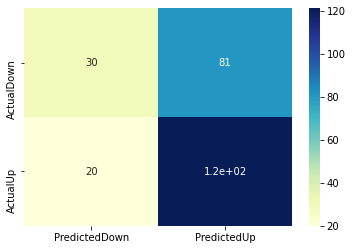

In [158]:
#QDA 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda=QuadraticDiscriminantAnalysis()
qda.fit(df6[['Lag1','Lag2']],df6["Direction"])
predictions=qda.predict(df5[['Lag1','Lag2']])

cmt= pd.DataFrame(confusion_matrix(df5["Direction"],predictions),index=["ActualDown","ActualUp"],columns=["PredictedDown","PredictedUp"])
sns.heatmap(cmt,cmap="YlGnBu",annot=True)

print(accuracy_score(df5["Direction"],predictions))

print("group means:",lda.means_)
print("priors:",lda.priors_)
print("coeff:",lda.coef_)

0.5


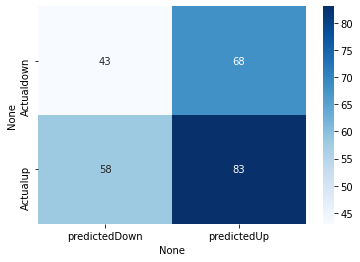

In [174]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(df6[['Lag1','Lag2']],df6["Direction"])
predictions2=knn.predict(df5[['Lag1','Lag2']])
cmt2=pd.DataFrame(confusion_matrix(df5["Direction"],predictions2),index=[["Actualdown","Actualup"]],columns=[["predictedDown","predictedUp"]])
sns.heatmap(cmt2,cmap="Blues",annot=True)
print(accuracy_score(df5["Direction"],predictions2))



In [5]:
#caravan set
D=pd.read_csv("Caravan.csv")
D=D.drop([D.columns[0],],axis=1)
D["Purchase"].value_counts()


No     5474
Yes     348
Name: Purchase, dtype: int64